# Exercise: Off-the shelf models from HuggingFace
The purpose of today's module is to introduce you to techniques for advanced machine learning pipelines in Economic History. But first of all, we will skip ahead to the end and show you a very simple way of interacting with cutting edge off-the-shelf models.

We don't have to reinvent the wheel. The AI community has a culture of open source and sharing. This also means that even some of the largest and most advanced ML models (in their trained form) are freely available. In this exercise, we will have a look at one of the popular sites, [HuggingFace](https://huggingface.co/), which hosts models like this.

The goal of the following exercise is to:
1. Introduce you to Python
2. Familiarize you with the `pipeline` interface in the `transformers` library
3. Introduce you to one of the most common text analysis tools: Sentiment analysisis

## Prewritten functions
Since the point of this is not for you to get caught in data-tinkering, we have written a few functions to handle things that otherwise takes some tinkering. You can see them below, and you have to load them to be able to solve the exercises.

In [172]:
# Libraries
import requests 
import re 
import matplotlib.pyplot as plt

In [160]:
def get_notes_from_the_underground():
    """
    This function retrieves *Notes from the Underground* from the Gutenberg
    website. It also does some text cleaning and separates each sentence into
    list elements. 
    """
    url = 'https://www.gutenberg.org/cache/epub/600/pg600.txt'
    response = requests.get(url)
    if response.status_code == 200:
        response.encoding = 'utf-8'
        text = response.text

        # Split text into sentences
        sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s|\r\n\r\n', text)

        # Clean text
        sentences = sentences[11:]
        sentences = sentences[:-117]
        
        return sentences
        
    else:
        raise Exception(f"Failed to retrieve data from {url}. Status code: {response.status_code}")
    
    return text


In [210]:
def get_pride_and_prejudice():
    """
    This function retrieves "Pride and Prejudice" by Jane Austen from the
    Gutenberg website. It also does some text cleaning and separates each 
    sentence into list elements. 
    """
    url = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
    response = requests.get(url)
    if response.status_code == 200:
        response.encoding = 'utf-8'
        text = response.text

        # Split text into sentences
        sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s|\r\n\r\n', text)

        # Clean text
        sentences = sentences[300:]
        sentences = sentences[:-121]
        
        return sentences
        
    else:
        raise Exception(f"Failed to retrieve data from {url}. Status code: {response.status_code}")
    
    return text

In [186]:
def get_positive_score(x):
    """
    The pipeline returns 'POSITIVE' or 'NEGATIVE' and a probability, where the 
    label is based on what is the most likely sentiment of the sentence. It
    turns out to be useful to have one continuous score from -1 to 1, which 
    captures completely 'postive' if 1 and completely 'negative' if -1. This 
    function handles that.
    """
    if x["label"] == "POSITIVE":
        res_x = x['score']
    elif x["label"] == "NEGATIVE":
        res_x = 1 - x['score']
    else:
        raise Exception(x["label"]+"This should not be possible")

    res_x = res_x*2-1 # Expand to -1 to 1 scale
    
    return res_x

## Exercise 1
One of the most common tasks to run on texts is sentiment analysis. In sentiment analysis, we are interested in extracting a positive or negative score of a piece of text. This could be anything from [historical diaries](https://doi.org/10.1111/ehr.13344), to modern financial news. 

In this exercise, you are asked to run sentiment analysis on all of ["Notes from the Underground" by Fyodor Dostoyevsky](https://www.gutenberg.org/cache/epub/600/pg600.txt)

### Exercise 1.1
You can access many of the highest-performing transformer models via a simple call to `pipeline` to initiate a model.

**a) Please execute the code below. Is the results as expected? How would the result be, if we simply counted positive words?**

In [163]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english")
result = classifier("That would have been splendid. Absoloutly amazing. But it was quite the opposite.")
print(result)

[{'label': 'NEGATIVE', 'score': 0.9866785407066345}]


**b) Try running the classifier on the opening of *Notes from the Underground*:**
> "I am a sick man.... I am a spiteful man. I am an unattractive man. I 
believe my liver is diseased".

In [159]:
result = classifier("I am a sick man.... I am a spiteful man. I am an unattractive man. I believe my liver is diseased.")
print(result)

[{'label': 'NEGATIVE', 'score': 0.9980927109718323}]


### Exercise 1.2
We will now load up the entire book to run the analysis on the entire book. We've written a small function, `get_notes_from_the_underground`, for you to execute this easily. 

**a) Use `get_notes_from_the_underground` to load the text into an object called `notes_from_the_underground`**  
**b) Print `text[0:10]`. Does this correspond to the text in the book? https://www.gutenberg.org/cache/epub/600/pg600.txt**  
**c) Apply sentiment analysis to element of the `text` object.**  
**d) Copy paste this exercise (including context) and ask ChatGPT for Python code to illustrate how sentiment develops over time. (Hint: look at moving averages over 50 sentences).**  
**e) Extra: Run the same analysis for *Pride and Prejudice* by Jane Austin using the function already supplied to load the text**

#### a)

In [161]:
notes_from_the_underground = get_notes_from_the_underground()

#### b)

In [162]:
print(notes_from_the_underground[0:10])

['\r\nNotes from the Underground', 'by Fyodor Dostoyevsky', '\r\nContents', ' NOTES FROM THE UNDERGROUND', ' PART I Underground\r\n I\r\n II\r\n III\r\n IV\r\n V\r\n VI\r\n VII\r\n VIII\r\n IX\r\n X\r\n XI', ' PART II À Propos of the Wet Snow\r\n I\r\n II\r\n III\r\n IV\r\n V\r\n VI\r\n VII\r\n VIII\r\n IX\r\n X', '', '\r\nNOTES FROM THE UNDERGROUND[*]\r\nA NOVEL', '\r\n* The author of the diary and the diary itself are, of course,\r\nimaginary.', 'Nevertheless it is clear that such persons as the writer of\r\nthese notes not only may, but positively must, exist in our society,\r\nwhen we consider the circumstances in the midst of which our society is\r\nformed.']


In [184]:
out = classifier(notes_from_the_underground) 
positive = [get_positive_score(x) for x in out]

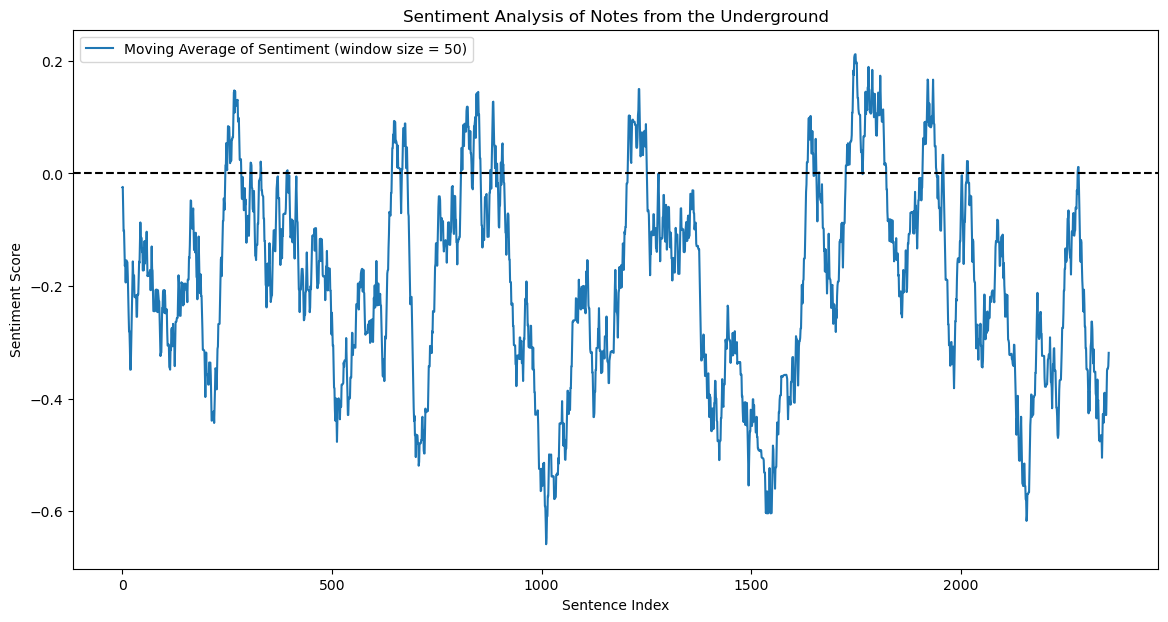

In [188]:
# Calculate the moving average over 50 sentences
window_size = 50
moving_averages = []
for i in range(len(positive) - window_size + 1):
    window = positive[i:i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)

# Plot the moving averages
plt.figure(figsize=(14, 7))
plt.plot(moving_averages, label='Moving Average of Sentiment (window size = 50)')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Notes from the Underground')
plt.legend()
plt.show()

In [180]:
# Are the sentences around index 1000 really that dark?
' '.join(notes_from_the_underground[900:1100])

# Yes. This is chapter III. About the old school friends where he gets himself invited to dinner. 

'I believe I had transferred into the department I was in\r\nsimply to avoid their company and to cut off all connection with my\r\nhateful childhood. Curses on that school and all those terrible years\r\nof penal servitude! In short, I parted from my schoolfellows as soon as\r\nI got out into the world. There were two or three left to whom I nodded\r\nin the street. One of them was Simonov, who had in no way been\r\ndistinguished at school, was of a quiet and equable disposition; but I\r\ndiscovered in him a certain independence of character and even honesty\r\nI don’t even suppose that he was particularly stupid. I had at one time\r\nspent some rather soulful moments with him, but these had not lasted\r\nlong and had somehow been suddenly clouded over. He was evidently\r\nuncomfortable at these reminiscences, and was, I fancy, always afraid\r\nthat I might take up the same tone again. I suspected that he had an\r\naversion for me, but still I went on going to see him, not being quite

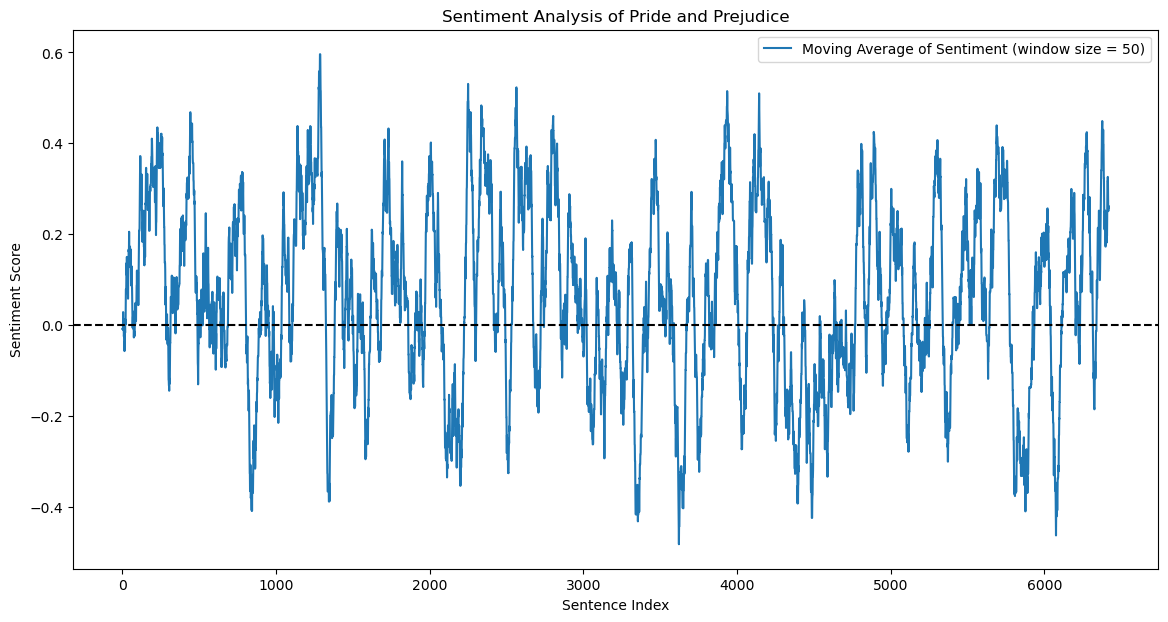

In [212]:
# Get text
pride_and_prejudice = get_pride_and_prejudice()

# Run sentiment analysis
out = classifier(pride_and_prejudice) 
positive = [get_positive_score(x) for x in out]

# Calculate the moving average over 50 sentences
window_size = 50
moving_averages = []
for i in range(len(positive) - window_size + 1):
    window = positive[i:i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)

# Plot the moving averages
plt.figure(figsize=(14, 7))
plt.plot(moving_averages, label='Moving Average of Sentiment (window size = 50)')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Pride and Prejudice')
plt.legend()
plt.show()
